
# Checker Players
Project mentor: Sophia Sklaviadis

Jacob Lopez <jlopez70@jh.edu>, Hannah Qu <hqu6@jh.edu>, Noam Rotenberg <nrotenb1@jh.edu>, Smriti Srikanth <ssrikan2@jh.edu>

https://github.com/smritisrikanth/MLProject.git

# Outline and Deliverables

Training an AI to play checkers requires the use of reinforcement learning which is a very special machine learning framework in that your data does not come from a static dataset, but instead from an interactive environment. As a result, ubiquitous machine learning libraries, such as PyTorch and Tensorflow, do not come prebaked with a reinforcement learning pipeline.  Hence, the deliverables for this project can largey be split up into two categories, the first is the creation of the environment and the pipeline needed to test and train different AI players. The second is the implementation and evaluation of the different AI players. Here is a rundown of our progress:

### Completed Deliverables
1. "Must complete, #1.1": Create the checkers game environment, which we discuss in [dataset below](#scrollTo=zFq-_D0khnhh).
2. "Must complete, #1.2": Implement a deterministic, non-learning player. The Minimax player achieves this. This is discussed in [methods below](#scrollTo=PqB48IF9kMBf&line=16&uniqifier=1).
3. "Must complete, #1.3": Implement a Deep Q-Learning model, which is discussed in [methods below](#scrollTo=PqB48IF9kMBf&line=16&uniqifier=1).
4. “Must complete, #1.4”: Train the Deep Q-Learning model on at least 100,000 games. This was achieved (we trained a model on 150,000 games); however, the model’s performance did not meet our standards, so we made changes and tuned hyperparameters; we were not able to train the final model on 100,000 games.
5. "Expect to complete, #2.1": Augment the Minimax player with Alpha-Beta pruning, which will greatly improve the computational efficiency (and therefore, the depth and quality) of the Minimax player, which is discussed in [methods below](#scrollTo=PqB48IF9kMBf&line=16&uniqifier=1).
6. "Expect to complete, #2.2": Experiment with different reward functions for the learning model, including adjusting rewards and costs of the reward shaping approach, which is discussed in [methods](#scrollTo=PqB48IF9kMBf&line=16&uniqifier=1) and [discussion](#scrollTo=ugJXhZKNlUT4) below.


### Additional Deliverables
1. We made our repository available on pip. This provided increased functionality, e.g., allowing us to run some of our code on Google Colaboratory. This also allows for others to use our work. 

### Uncompleted Deliverables
1. "Expect to complete #2.3": Implement and train a transformer model to compare with the Minimax and Deep Q-Learning models. We discussed this with a TA, who said that transformer models require a lot of computational power for training, so we decided to work on our other models.
2. “Would like to complete #3.1”: Program a user interface so that our model can play with a human competitor in real time. We did not do this because our models did not perform as well as we would have liked against the random player, so we decided to focus on training the Deep Q-Learning model instead of implementing this.
3. “Would like to complete #3.2”: Train a model that can consistently beat a human player. Unfortunately, our models did not advance to this point. Also, this deliverable is dependent on the implementation of a user interface, which we did not have the time to focus on.
4. “Would like to complete #3.3”: Implement different environmental conditions so that our model can train on more challenging board states (e.g. model starts with 1 less chip). We did not do this due to time constraints and our decision to focus on other parts of the project.

# Preliminaries

## Our Problem

Checkers is a [combinitorial game](https://en.wikipedia.org/wiki/Combinatorial_game_theory) and is hence widly studied as a benchmarking task for intelligent AI. An exhaustive list of checker rules can be found [here](https://winning-moves.com/images/kingmerulesv2.pdf) but, in short, checkers is a tiled board game (much like chess) where each player takes turns moving one of their pieces. If a piece from one player is near a piece from the opposing player, then the piece may be able to "eat" (remove from the board) the piece of the opposing player. The game ends when one player eats all the pieces of the other player. 

Checkers is a game that has been studied and played for over a century. As a result, there is a natural curiosity to find an optimal checkers strategy. On April 29th, 2007 researchers were able to exhaustively search through every possible game of checkers and were hence able to find an optimal strategy. However, memorizing this strategy (i.e. keeping it in memory) is not feasible as there are over 10^20 possible games. Artificial intelligence, however, can fit into memory and can still perform quite well. 

Reinforcement learning is a machine learning technique used to train a model to perform a series of actions in an environment. Although the checker AIs we used don't have much direct use, the study of reinforcement learning has applications in medicine, decision making, language modeling, and animation.

This problem is unique for several reasons. The first is that our checker AIs have to evaluate the game in a move-by-move basis. Hence this problem is most similar to the problem covered in class of logical entailment using transformers. This is because in both cases, what we care about is a final value (contradiction vs entailment and win vs lose) which is created from a sequences of tokens (words and moves). 

As a quick note, the majority of our code was made available through pip. This improves distributability and makes it much easier to run our pipelines on collab. We will now install our package so that it can be used throughout this notebook.

In [1]:
!pip install checker-players

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Dataset(s)

Since this is a reinforcement model, we did not rely on an explicit dataset. Instead, our data comes from an internal implementation of checkers. More specifically, the data would be the board states, representations of the different pieces and their positions on the game board. The checkers board is represented as an 8x8 integer matrix, where each integer is a label for the different types of pieces. For example, a non-king piece that is owned by player 1 is represented by the integer 1, meanwhile king pieces owned by player 2 is represented by the integer 4. The integers are just labels and can be chosen arbitrarily. There are technically $5 \cdot 10^{20}$ possible board states on a checkers board, but we could not reasonably train our model on all of these board states. Instead, we had our model play against itself, and throughout the course of the play, our model has trained on some pseudorandom subset of all the possible board states. 

To load in some examples of our data, we first have to construct our environment.

In [2]:
from checker_players.Checker_Environment.Board import Board
checkers_board = Board()

We can now see how what the current board state is. For ease of use, a print function is already implemented which allows us the visualize the data.

In [3]:
# Printing out the raw data which captures the current board state
print(checkers_board.spots)

# Prints out an ASCII visualization of the data
checkers_board.print_board()

[[0, 1, 0, 0, 0, 2, 0, 2], [1, 0, 1, 0, 0, 0, 2, 0], [0, 1, 0, 0, 0, 2, 0, 2], [1, 0, 1, 0, 0, 0, 2, 0], [0, 1, 0, 0, 0, 2, 0, 2], [1, 0, 1, 0, 0, 0, 2, 0], [0, 1, 0, 0, 0, 2, 0, 2], [1, 0, 1, 0, 0, 0, 2, 0]]
|-----|-----|-----|-----|-----|-----|-----|-----|
|     |  o  |     |  o  |     |  o  |     |  o  |  
|-----|-----|-----|-----|-----|-----|-----|-----|
|  o  |     |  o  |     |  o  |     |  o  |     |  
|-----|-----|-----|-----|-----|-----|-----|-----|
|     |  o  |     |  o  |     |  o  |     |  o  |  
|-----|-----|-----|-----|-----|-----|-----|-----|
|     |     |     |     |     |     |     |     |  
|-----|-----|-----|-----|-----|-----|-----|-----|
|     |     |     |     |     |     |     |     |  
|-----|-----|-----|-----|-----|-----|-----|-----|
|  x  |     |  x  |     |  x  |     |  x  |     |  
|-----|-----|-----|-----|-----|-----|-----|-----|
|     |  x  |     |  x  |     |  x  |     |  x  |  
|-----|-----|-----|-----|-----|-----|-----|-----|
|  x  |     |  x  |     |  

Now we can move a few of the pieces to see how our data changes.

In [4]:
# We can move the O in position [1,2] to position [0,3]
checkers_board.make_move([[1,2],[0,3]])
checkers_board.print_board()

|-----|-----|-----|-----|-----|-----|-----|-----|
|     |  o  |     |  o  |     |  o  |     |  o  |  
|-----|-----|-----|-----|-----|-----|-----|-----|
|  o  |     |  o  |     |  o  |     |  o  |     |  
|-----|-----|-----|-----|-----|-----|-----|-----|
|     |     |     |  o  |     |  o  |     |  o  |  
|-----|-----|-----|-----|-----|-----|-----|-----|
|  o  |     |     |     |     |     |     |     |  
|-----|-----|-----|-----|-----|-----|-----|-----|
|     |     |     |     |     |     |     |     |  
|-----|-----|-----|-----|-----|-----|-----|-----|
|  x  |     |  x  |     |  x  |     |  x  |     |  
|-----|-----|-----|-----|-----|-----|-----|-----|
|     |  x  |     |  x  |     |  x  |     |  x  |  
|-----|-----|-----|-----|-----|-----|-----|-----|
|  x  |     |  x  |     |  x  |     |  x  |     |  
|-----|-----|-----|-----|-----|-----|-----|-----|


In [5]:
# We can move the X in position [2,5] to position [1,4]
checkers_board.make_move([[2,5],[1,4]])
checkers_board.print_board()

|-----|-----|-----|-----|-----|-----|-----|-----|
|     |  o  |     |  o  |     |  o  |     |  o  |  
|-----|-----|-----|-----|-----|-----|-----|-----|
|  o  |     |  o  |     |  o  |     |  o  |     |  
|-----|-----|-----|-----|-----|-----|-----|-----|
|     |     |     |  o  |     |  o  |     |  o  |  
|-----|-----|-----|-----|-----|-----|-----|-----|
|  o  |     |     |     |     |     |     |     |  
|-----|-----|-----|-----|-----|-----|-----|-----|
|     |  x  |     |     |     |     |     |     |  
|-----|-----|-----|-----|-----|-----|-----|-----|
|  x  |     |     |     |  x  |     |  x  |     |  
|-----|-----|-----|-----|-----|-----|-----|-----|
|     |  x  |     |  x  |     |  x  |     |  x  |  
|-----|-----|-----|-----|-----|-----|-----|-----|
|  x  |     |  x  |     |  x  |     |  x  |     |  
|-----|-----|-----|-----|-----|-----|-----|-----|


In [6]:
# We can move the O in position [0,3] to position [2,5]. This time, player1's piece (O) eats player2's piece (X)
checkers_board.make_move([[0,3],[2,5]])
checkers_board.print_board()

|-----|-----|-----|-----|-----|-----|-----|-----|
|     |  o  |     |  o  |     |  o  |     |  o  |  
|-----|-----|-----|-----|-----|-----|-----|-----|
|  o  |     |  o  |     |  o  |     |  o  |     |  
|-----|-----|-----|-----|-----|-----|-----|-----|
|     |     |     |  o  |     |  o  |     |  o  |  
|-----|-----|-----|-----|-----|-----|-----|-----|
|     |     |     |     |     |     |     |     |  
|-----|-----|-----|-----|-----|-----|-----|-----|
|     |     |     |     |     |     |     |     |  
|-----|-----|-----|-----|-----|-----|-----|-----|
|  x  |     |  o  |     |  x  |     |  x  |     |  
|-----|-----|-----|-----|-----|-----|-----|-----|
|     |  x  |     |  x  |     |  x  |     |  x  |  
|-----|-----|-----|-----|-----|-----|-----|-----|
|  x  |     |  x  |     |  x  |     |  x  |     |  
|-----|-----|-----|-----|-----|-----|-----|-----|


Finally we can refresh the board and start a new game.

In [7]:
# We now reset the board, always done when starting a new game
checkers_board.reset_board()
checkers_board.print_board()

|-----|-----|-----|-----|-----|-----|-----|-----|
|     |  o  |     |  o  |     |  o  |     |  o  |  
|-----|-----|-----|-----|-----|-----|-----|-----|
|  o  |     |  o  |     |  o  |     |  o  |     |  
|-----|-----|-----|-----|-----|-----|-----|-----|
|     |  o  |     |  o  |     |  o  |     |  o  |  
|-----|-----|-----|-----|-----|-----|-----|-----|
|     |     |     |     |     |     |     |     |  
|-----|-----|-----|-----|-----|-----|-----|-----|
|     |     |     |     |     |     |     |     |  
|-----|-----|-----|-----|-----|-----|-----|-----|
|  x  |     |  x  |     |  x  |     |  x  |     |  
|-----|-----|-----|-----|-----|-----|-----|-----|
|     |  x  |     |  x  |     |  x  |     |  x  |  
|-----|-----|-----|-----|-----|-----|-----|-----|
|  x  |     |  x  |     |  x  |     |  x  |     |  
|-----|-----|-----|-----|-----|-----|-----|-----|


## Pre-processing

Since we created an environment from which our models learned (rather than using a dataset), our data did not require significant preprocessing. However, we did implement an interpreter (FlatFeaturesInterpretter) to convert our 8x8 matrices describing board states to flat 1D arrays of length 32 to limit the input to 32 features: each of the possible spots where there can be a piece. Each feature is a number -2, -1, 0, 1, or 2, corresponding to a Player 2 king, Player 2 piece, empty space, Player 1 piece, and Player 1 king, respectively; this is processed by the models from the Board, which uses the corresponding numbers 0, 1, 2, 3, and 4 as empty space, Player 1 piece, Player 2 piece, Player 1 king, and Player 2 king, respectively.

We chose this dataset because we think using the checkers board game pieces from the model’s played games as data is most reasonable for learning/training. Our features are categorical (chosen from a finite set of possible board states). We did not apply convolutions or other distorting functions to create new features because the exact position and type of piece on the board is important to know (convolutions are useful when searching throughout an image).

In [8]:
# For those same examples above, what do they look like after being pre-processed?

from checker_players.Interpretters.FlatFeaturesInterpretter import FlatFeaturesInterpretter
from checker_players.Interpretters.DoubleColumnInterpretter import DoubleColumnInterpretter

ffi = FlatFeaturesInterpretter()
array = ffi.interpret(checkers_board.spots)
print(array)

[1, 0, 2, 2, 1, 1, 0, 2, 1, 0, 2, 2, 1, 1, 0, 2, 1, 0, 2, 2, 1, 1, 0, 2, 1, 0, 2, 2, 1, 1, 0, 2]


# Models and Evaluation

## Experimental Setup

We evaluated our methods by having players (models) of different types compete against each other. The specific metric we used was the percentage of games that the trained player won, which is reasonable considering that the goal is for our trained models to make intelligent enough choices to defeat human players.

We implemented our own loss functions, which increase linearly from 0 to a certain value as the game is played. First, we tried one that increases from 0 to 1 linearly (reaches 1 at the end of the game). Since this did not produce a very successful model, we then adjusted it to increase from 0 to 10 divided by the square of the number of moves taken to finish the game (-10 instead of 10 if the game was won by the player that is currently learning).

Given an array `board_states` (which consists of all of board states of a checkers game) and the value `won` (which equals 1 if the player won, and -1 otherwise), the corresponding loss for each state is held in the following array:

```
losses = np.linspace(0, won * 10 / len(board_states)**2, len(board_states))
```

We chose loss to be increasing in magnitude because the outcome of the game is not determined fully by the first few states of the game (especially the default starting position, which always has loss 0). We also tried a loss proportional to $1/N$ instead of $1/N^2$. Further details about the loss function implementations are found toward the end of [methods](#scrollTo=PqB48IF9kMBf&line=7&uniqifier=1).

There was no need to split our data because the checkers environment we programmed generated games (logged as a sequence of board states) for us to use to train our models. Similarly, we tested our models by having them play against other players/models, so there was no need to create an explicit test set. 


## Baselines 

We implemented a random player that always makes a random move. This represents a player that has no knowledge about the game and hence serves as a baseline for whether or not a model has learned. Any model that performs better than the random player is assumed to be a weak learner. We can also test how good weak learners are by seeing how many turns it take for them to win against the random player.

Other groups have worked on this problem. Most resources recommend using Deep Q-Learning to solve this problem, which we have done, but there are many combinations of hyperparameters that can be used with this method, including learning rate and reward function; length of training can also be tuned. Some other groups have implementations stronger than ours. For example, [this website](https://cardgames.io/checkers/) has a checkers AI that is a very good checkers player, while our model is only moderately better than a random player.

## Methods

We implemented two main algorithms for our project. The first method was a Minimax player with alpha-beta pruning. To do this, we first implemented a Minimax player. The Minimax algorithm creates a tree of a given depth $\textit{d}$ of all possible board states after $\textit{d}$ number of turns. After the depth is reached, there is a deterministic evaluation function applied to each board state. Since the function is deterministic, there is no learning involved in the minimax algorithm. We chose this function to be the number of friendly pieces minus the number of enemy pieces. However, this is just one of many possible functions with which we wanted to experiment. Once all of the values of the nodes of a branch are determined, there are alternating minimizations and maximizations of the set of child node values. \[This process is visualized in [this](https://upload.wikimedia.org/wikipedia/commons/thumb/6/6f/Minimax.svg/600px-Minimax.svg.png) image.] This process assumes that the player will make the move that is optimal for them (hence the maximization) and the opponent will make the move that is optimal for the opponent (hence the minimization). The major limiting factor of this method is the depth of the tree. Our default tree depth is 5 because greater depths require too much computational power. The Minimax algorithm with alpha-beta pruning helps address this problem. Alpha-beta pruning means that the tree is not explored in its entirety; if it is known that a group of branches has a poorer outcome than branches that were already investigated, then the algorithm does not have to spend the time exploring those branches. Therefore, the algorithm is more efficient than the vanilla minimax algorithm, which allows us to increase the depth cut-off $\textit{d}$.

The second method we used was Deep Q-Learning. This method was developed by Google’s DeepMind, which applied this method to develop AlphaGo, the first AI to beat an expert player of the game “Go.” This method is an application of Q-Learning. In Q-Learning, a 2D table is created (initially, with random initialization); 1 dimension is all possible states, and in the other dimension is all possible actions that can be performed. A given state and a possible action at that state correspond to a value (a “Q” value, or quality value) that quantifies the desirability of choosing that possible action given the current state. The model is learned through the program updating the Q-value while playing the game: $Q^{new} (s_t, a_t) \xleftarrow{} Q(s_t, a_t) + \alpha \cdot (r_t + \gamma \cdot \max\limits_a Q(s_{t+1}, a) – Q(s_t, a_t))$. The hyperparameters are $\alpha, \ r_t, \ \gamma$ which are the learning rate, reward, and discount factor, respectively. The discount factor $\gamma$ determines the weight of consideration of future rewards (low $\gamma$ makes the model more short-sighted, giving most weight toward recent rewards). Note that $Q(s_t, a_t)$ is the previous Q-value.

Checkers has too many possible board states and actions for Q-learning to be feasible. Since neural networks with nonlinear activation functions are universal function approximators, Deep Q-Learning uses neural networks to approximate the Q-table. We set up our Deep Q-Learning model as a neural network with 5 of layers; the input is a board state; the output is the reward associated with that state. We chose the reward function to be a linear function, $w * 10*f / N^2$, where $w = 1$ if the player won (and $-1$ if the player lost), $N$ is the total number of turns in the game, and $f$ represents the fraction of how far into the game the board state is (for turn $n$, $f = n/N$). Note that we implemented this in pytorch as a loss function, where loss = -reward. The first board state has a reward of 0, because no player has an advantage yet. The last board state, where the player is about to win, has the maximal reward of $10 / N^2$. The square term increases the reward when a player wins quickly and increases the penalty when a player loses quickly (relative to other games). Note that we also experimented with another Deep Q-Learning player (DQNPlayer2), which is setup as a wider network, with 7 layers, and a loss function that varies with $1/N$.

Code for training models can be found in our [git repository](https://github.com/smritisrikanth/MLProject.git), in the respective Player files in the directory MLProject/src/checker_players/Players. Plots of training performance are shown in results, below.

## Results

As expected, the Minimax player with Alpha-Beta pruning performed very well, especially against the random player.
However, some of our results surprised us. We expected the Deep Q-Learning model to perform the best because it is designed to learn the quality of board states with more complexity. We think that we have had problems with training, because our metrics (accuracy against other, deterministic players) do not converge. We have worked to address this issue through changing hyperparameters, including the learning rate and reward function. We also tried increasing number of training epochs and trying other network architectures.

Other "data" we could have used includes training the model against other models, for example, a more experienced model available online. This might have increased the skill of our model. However, if the online model is too hard, then our novice model might never win a game, so it might not learn successfully.

Text(0, 0.5, 'Proportion of Games Won In Current Set of 100')

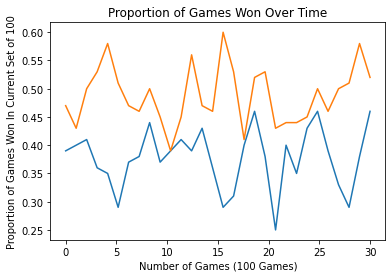

In [9]:
import matplotlib.pyplot as plt
import numpy as np

player1WRHistoryV3 = [0.3900000000000002, 0.4000000000000002, 0.4100000000000002, 0.36000000000000015, 0.35000000000000014, 0.2900000000000001, 0.37000000000000016, 0.38000000000000017, 0.4400000000000002, 0.37000000000000016, 0.3900000000000002, 0.4100000000000002, 0.3900000000000002, 0.4300000000000002, 0.36000000000000015, 0.2900000000000001, 0.3100000000000001, 0.4000000000000002, 0.46000000000000024, 0.38000000000000017, 0.25000000000000006, 0.4000000000000002, 0.35000000000000014, 0.4300000000000002, 0.46000000000000024, 0.3900000000000002, 0.3300000000000001, 0.2900000000000001, 0.38000000000000017, 0.46000000000000024]
player2WRHistoryV3 = [0.47000000000000025, 0.4300000000000002, 0.5000000000000002, 0.5300000000000002, 0.5800000000000003, 0.5100000000000002, 0.47000000000000025, 0.46000000000000024, 0.5000000000000002, 0.45000000000000023, 0.3900000000000002, 0.45000000000000023, 0.5600000000000003, 0.47000000000000025, 0.46000000000000024, 0.6000000000000003, 0.5300000000000002, 0.4100000000000002, 0.5200000000000002, 0.5300000000000002, 0.4300000000000002, 0.4400000000000002, 0.4400000000000002, 0.45000000000000023, 0.5000000000000002, 0.46000000000000024, 0.5000000000000002, 0.5100000000000002, 0.5800000000000003, 0.5200000000000002]

games = np.linspace(0,len(player1WRHistoryV3),len(player1WRHistoryV3))

plt.plot(games, player1WRHistoryV3, label = 'Player 1')
plt.plot(games, player2WRHistoryV3, label = 'Player 2')
plt.title('Proportion of Games Won Over Time')
plt.xlabel('Number of Games (100 Games)')
plt.ylabel('Proportion of Games Won In Current Set of 100')

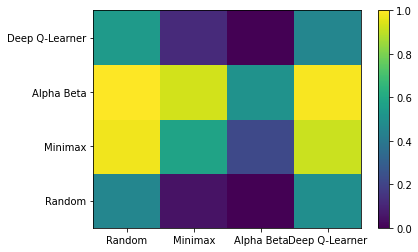

In [10]:
evaluation_labels_x = ["Random", "Minimax", "Alpha Beta", "Deep Q-Learner"]
evaluation_labels_y = ["Random", "Minimax", "Alpha Beta", "Deep Q-Learner"]
evaluation_results = [[.46, .05, 0, .49],[.98, .58, .22, .92],[1,.93,.51,.99],[.54, .12, 0, .46]]


fig, ax = plt.subplots()
heatmap = ax.pcolor(evaluation_results)
cbar = plt.colorbar(heatmap)
ax.set_xticklabels(evaluation_labels_x)
ax.set_yticklabels(evaluation_labels_y)

ax.set_xticks(np.arange(len(evaluation_results)) + 0.5, minor=False)
ax.set_yticks(np.arange(len(evaluation_results)) + 0.5, minor=False)

plt.show()

# Discussion

## What we've learned

The concepts from lecture that are most relevant to our project are neural networks (multilayer perceptron, to be specific) and stochastic gradient descent, which we used to train our models. We were surprised by the flexibility we had in choosing network architectures and loss functions, as well as how many ways we could have encoded the state of the checkers board. Some examples of neural network architectures in include: inputting a board state and outputting quality of the board state (Deep Q-Learning), inputting 2 board states (current state and possible action) and outputting quality of that decision, and inputting a board state and outputting a one-hot encoding of which game piece to move. Another style of architectures include Recurrent Neural Networks (RNNs) or Long-Short Term Memory (LSTMs), which might take in all of the board states of a game, one at a time. A third style of architectures would include transformers or attention, which would help the model process information from across the board. Another way to encode the board state would use one-hot encoding, so that for each of the 32 board spots, there is a sequence of 0s (and one 1) representing 5 options: player1 piece, player1 king, player2 piece, player2 king, and empty space. If we had two more weeks to work on this project, our group would enjoy experimenting with how these various setups affect the model training.

We did not anticipate both of our Deep Q-Learning models being relatively unsuccessful, and if we had more time at this point we would likely also want to experiment with other types of models. This has taught us to keep several options open in terms of models when working on future ML projects, as it is clear that the first few ideas we try may not always work.

The most helpful feedback we received after our presentation was to make sure to explain our methods in detail in our report, as it made us aware that most people are not familiar with the methods we used and helped us ensure that we were very thorough in our explanation.